In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor

In [ ]:
training_data = pd.read_csv("training_dataset.csv")
test_data_body = pd.read_csv("testing_bodytrack.csv")
test_data_black = pd.read_csv("testing_blackscholes.csv")

In [ ]:
training_data

,total_watts,w_big,w_little,w_gpu,w_mem,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,3.065,0.474810,0.033012,0.096321,0.048800,0.0,0.0,0.0,0.0,49,53,52,48,47,1000000000
1,2.706,0.235620,0.032095,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
2,2.706,0.235620,0.034846,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
3,2.637,0.234685,0.034846,0.096321,0.037758,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000
4,2.637,0.233750,0.033929,0.096321,0.032886,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,3.844,1.157646,0.039474,0.123132,0.035380,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000
5411,3.851,1.157646,0.038514,0.123132,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000
5412,3.851,1.156364,0.041310,0.124125,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000
5413,3.851,1.158024,0.037638,0.124125,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000


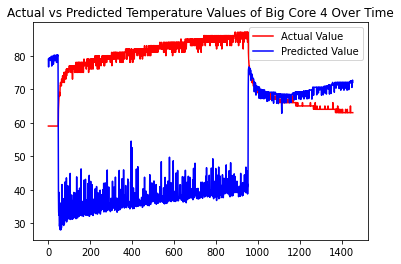

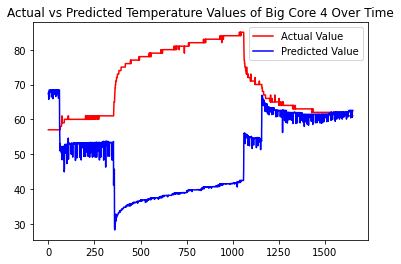

Bodytrack MSE for temp4 :  1260.3250529966663
Blackscholes MSE for temp4 :  773.2488488610343
Bodytrack MSE for temp5 :  1670.7734004992692
Blackscholes MSE for temp5 :  969.9160249304584


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Bodytrack MSE for temp6 :  1837.0898653199608
Blackscholes MSE for temp6 :  1137.8717133699402
Bodytrack MSE for temp7 :  1512.3059642767937
Blackscholes MSE for temp7 :  942.0565858282071


In [ ]:
 import matplotlib.pyplot as plt

cores = ['temp4', 'temp5', 'temp6', 'temp7']

for c in cores:

  X_train = training_data.drop([c, 'total_watts', 'w_big', 'w_little','w_gpu','w_mem'], axis = 1)
  y_train = training_data[c]
  X_body = test_data_body.drop([c, 'total_watts', 'w_big', 'w_little','w_gpu','w_mem'], axis = 1)
  y_body = test_data_body[c]
  X_black = test_data_black.drop([c, 'total_watts', 'w_big', 'w_little','w_gpu','w_mem'], axis = 1)
  y_black = test_data_black[c]

  standard_scaler = StandardScaler()
  X_train = standard_scaler.fit_transform(X_train)
  X_body = standard_scaler.fit_transform(X_body)
  X_black = standard_scaler.fit_transform(X_black)

  mlp = MLPRegressor(hidden_layer_sizes = (128,64,32), activation = 'relu', random_state=42)
  mlp.fit(X_train, y_train)
  predict_body = mlp.predict(X_body)
  predict_black = mlp.predict(X_black)

  if c == 'temp4':
    plt.title('Actual vs Predicted Bodytrack Temperature Values of Big Core 4 Over Time')
    plt.plot(y_body, 'r', label = 'Actual Value')
    plt.plot(predict_body, 'b', label = 'Predicted Value')
    plt.legend()
    plt.show()
  
  if c == 'temp4':
    plt.title('Actual vs Predicted Blackscholes Temperature Values of Big Core 4 Over Time')
    plt.plot(y_black, 'r', label = 'Actual Value')
    plt.plot(predict_black, 'b', label = 'Predicted Value')
    plt.legend()
    plt.show()


  print("Bodytrack MSE for", c, ": ", mean_squared_error(y_body,predict_body))
  print("Blackscholes MSE for", c, ": ", mean_squared_error(y_black,predict_black))